In [3]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os.path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#creating dataframes for the .csv files
length_1000 = pd.read_csv(os.getcwd() + "\\project_files\\length_1000.csv")
length_1200 = pd.read_csv(os.getcwd() + "\\project_files\\length_1200.csv")
length_1400 = pd.read_csv(os.getcwd() + "\\project_files\\length_1400.csv")
length_1600 = pd.read_csv(os.getcwd() + "\\project_files\\length_1600.csv")
length_1650 = pd.read_csv(os.getcwd() + "\\project_files\\length_1650.csv")
length_1800 = pd.read_csv(os.getcwd() + "\\project_files\\length_1800.csv")
length_2000 = pd.read_csv(os.getcwd() + "\\project_files\\length_2000.csv")
length_2200 = pd.read_csv(os.getcwd() + "\\project_files\\length_2200.csv")
length_2400 = pd.read_csv(os.getcwd() + "\\project_files\\length_2400.csv")

# Dataframe Refining For Research: Starting Gate
##### This section is dedicated to editing the dataframes to be suitable for the research question; "Does starting gate offer an advantage to horses in racing?" Since they have been cleaned already in a previous notebook we will just be deciding what columns we want to keep for the question of Weight.

In [5]:
#creating a function to handle the various strings found within the finishing_position column, -1 represents a DNF value
def no_more_strings(df):
    stringarray=['DH', 'UR', 'PU', 'FE', 'DNF', 'DISQ']
    for string in stringarray:
        df['finishing_position'] = df['finishing_position'].str.replace(" ","")
        if string == 'DH':
            df['finishing_position'] = df['finishing_position'].str.replace(string, '')
        else:
            df['finishing_position'] = df['finishing_position'].str.replace(string, '-1')
    return df

In [6]:
#cleaning the finishing_positon column of strings using a function created above
length_1000 = no_more_strings(length_1000)
length_1200 = no_more_strings(length_1200)
length_1400 = no_more_strings(length_1400)
length_1600 = no_more_strings(length_1600)
length_1650 = no_more_strings(length_1650)
length_1800 = no_more_strings(length_1800)
length_2000 = no_more_strings(length_2000)
length_2200 = no_more_strings(length_2200)
length_2400 = no_more_strings(length_2400)

In [7]:
#creating a function to handle the data type conversation of finishing_position to float accross all dataframes
def finishing_position_conversion(df):
    df['finishing_position'] = df['finishing_position'].astype(int)
    return df

In [8]:
#converting the data type of finishing_position to float across all dataframes using the function above
length_1000 = finishing_position_conversion(length_1000)
length_1200 = finishing_position_conversion(length_1200)
length_1400 = finishing_position_conversion(length_1400)
length_1600 = finishing_position_conversion(length_1600)
length_1650 = finishing_position_conversion(length_1650)
length_1800 = finishing_position_conversion(length_1800)
length_2000 = finishing_position_conversion(length_2000)
length_2200 = finishing_position_conversion(length_2200)
length_2400 = finishing_position_conversion(length_2400)

In [9]:
#creating functions to create dataframes out of winners
def winners(df):
    df = df.loc[(df['finishing_position'] == 1.0)]
    return df

def winners_limited(df):
    df = df.loc[(df['finishing_position'] == 1.0) & (df['draw'] <=9)]
    return df

In [10]:
#creating the winners dataframe which handles all horses that came first from ALL starting gates
winners_1000 = winners(length_1000)
winners_1200 = winners(length_1200)
winners_1400 = winners(length_1400)
winners_1600 = winners(length_1600)
winners_1650 = winners(length_1650)
winners_1800 = winners(length_1800)
winners_2000 = winners(length_2000)
winners_2200 = winners(length_2200)
winners_2400 = winners(length_2400)

#creating the winners_limited dataframe to address the limitation we see where less races with 14 horses are present
winners_limited_1000 = winners_limited(length_1000)
winners_limited_1200 = winners_limited(length_1200)
winners_limited_1400 = winners_limited(length_1400)
winners_limited_1600 = winners_limited(length_1600)
winners_limited_1650 = winners_limited(length_1650)
winners_limited_1800 = winners_limited(length_1800)
winners_limited_2000 = winners_limited(length_2000)
winners_limited_2200 = winners_limited(length_2200)
winners_limited_2400 = winners_limited(length_2400)

In [11]:
#concating dataframes together to have one master frame
winners = pd.concat([winners_1000, winners_1200, winners_1400, winners_1600, winners_1650, winners_1800, winners_2000, winners_2200, winners_2400],ignore_index=True)

winners_limited = pd.concat([winners_limited_1000, winners_limited_1200, winners_limited_1400, winners_limited_1600, winners_limited_1650, winners_limited_1800, winners_limited_2000, winners_limited_2200, winners_limited_2400],ignore_index=True)

horses_all = pd.concat([length_1000, length_1200, length_1400, length_1600, length_1650, length_1800, length_2000, length_2200, length_2400],ignore_index=True)

In [12]:
#creating a function to handle the dropping of certain columns to tidy up the dataframes
def drop_column(df):
    df = df.drop(['running_position_1', 'running_position_2', 'running_position_3', 'running_position_4', 'running_position_5', 'running_position_6', 'Unnamed: 0', 'track_condition', 'actual_weight','jockey','declared_horse_weight', 'horse_id', 'race_course', 'race_name', 'track', 'src', 'race_date', 'race_number', 'race_class', 'trainer', 'length_behind_winner', 'sectional_time', 'incident_report',], axis=1)
    return df

In [13]:
#dropping columns from dataframe
winners = drop_column(winners)
winners_limited = drop_column(winners_limited)
horses_all = drop_column(horses_all)

## "Does starting gate offer an advantage to horses in racing?": 
##### Draw refers to the starting gate that a horse uses in a given race. The draw is randomly assigned to each horse in the race a few days before the race day. My idea is that the horses starting the race on the inside lane, or rather Gate 1, will have a notable advantage over the other horses. Below I display the winners dataframe, this dataframe handles all horses that finished the race in first and I will create a visualisation to show the number of occurances below and see if there is any truth to this theory.

In [14]:
winners

,draw,finish_time,finishing_position,horse_name,horse_number,race_distance,race_id,win_odds
0,10,0.56.36,1,SENSATION,8.0,1000,2014-005,15.0
1,6,0.55.79,1,BUNDLE OF JOY,5.0,1000,2014-009,2.8
2,9,0.56.09,1,DISCIPLES TWELVE,8.0,1000,2014-017,5.3
3,6,0.56.29,1,KIM GLORY,8.0,1000,2014-029,24.0
4,12,0.56.39,1,WILD BOY,3.0,1000,2014-037,5.5
5,2,0.55.94,1,SKY MAN,7.0,1000,2014-044,7.3
6,8,0.56.28,1,INCREDIBLE FELLOW,1.0,1000,2014-047,1.9
7,3,0.55.38,1,BUNDLE OF JOY,7.0,1000,2014-053,8.0
8,13,0.56.74,1,GLORY HORSIE,14.0,1000,2014-077,4.5
9,2,0.56.57,1,LOVELY DELOVELY,8.0,1000,2014-081,3.6


##### I know there are considerably less races with 12, 13 and 14 horses in them so in the cell following I will count the amount of horses in each race.

In [15]:
#checking to see how many races
horses_all['draw'].value_counts()

3     2361
5     2357
4     2355
6     2354
2     2354
1     2352
7     2344
8     2330
9     2305
10    2254
11    2197
12    2089
13    1001
14     920
15       1
Name: draw, dtype: int64

##### As we can see in the cell above there is a drop in races that have 10, 11, 12, 13 and 14 horses in them. This would give me a misleading visualisation which would suggest that any potential disadvantage that being assigned the 14th gate has, would be much bigger then it actually is. So I will make a visualisation that handles the whole set with limitations and follow that up with another visualisation for races that had <=9 horses as there exist a similar amount of races with 9 horses as there do with 5 horses for example.

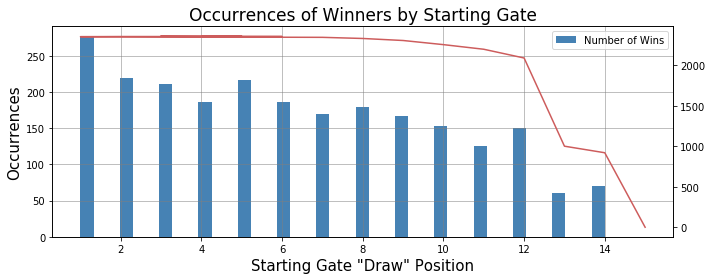

In [16]:
#visualisation for full dataset limitations and all
fig, ax = plt.subplots(figsize=(10, 4))
ax1 = winners['draw'].hist(ax=ax, alpha=1, bins=40, color='steelblue', label='Number of Wins')
ax.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.title('Occurrences of Winners by Starting Gate', fontsize = 17)
ax2 = ax.twinx()
ax2 = horses_all.draw.value_counts().plot(color = 'indianred')
ax.set_xlabel('Starting Gate "Draw" Position', fontsize = 15)
ax.set_ylabel('Occurrences', fontsize = 15)
ax.legend(ncol=2)
plt.tight_layout()
plt.savefig('starting_gate_pres.jpeg')

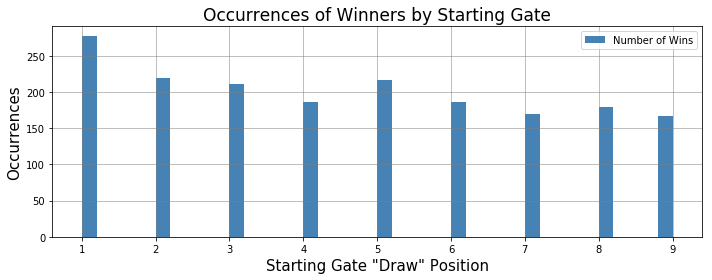

In [17]:
#creating the normalized visualisation
fig, ax = plt.subplots(figsize=(10, 4))
ax1 = winners_limited['draw'].hist(ax=ax, alpha=1, bins=40, color='steelblue', label='Number of Wins')
ax.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.title('Occurrences of Winners by Starting Gate', fontsize = 17)
ax.set_xlabel('Starting Gate "Draw" Position', fontsize = 15)
ax.set_ylabel('Occurrences', fontsize = 15)
ax.legend(ncol=2)
plt.tight_layout()
plt.savefig('starting_gate_pres_yes.jpeg')

## Conclusion
##### In conclusion, I think the findings of this question are quite interesting. After adjusting the data its quite telling how much of a tangible advantage there exists in just getting an inside lane start gate. Clearly this is not so much of an advantage that being assigned another gate is a road block to finishing the race in first however there is enough of a difference that exists in this dataset to show a distinct advantage to having an inside lane.